In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
X_train = np.load('../data/X_train.npy', allow_pickle = True)
X_test = np.load('../data/X_test.npy', allow_pickle = True)
y_train = np.load('../data/y_train.npy', allow_pickle = True)
y_test = np.load('../data/y_test.npy', allow_pickle = True)

In [38]:
!pip3 install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 3.1 MB/s eta 0:00:00a 0:00:01


In [39]:
## smote to balance the data

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [69]:
X_test, y_test = sm.fit_resample(X_test, y_test)

In [41]:
model = Sequential()

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [70]:
history = model.fit(x = X_train, y = y_train, epochs = 200, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7292 - accuracy: 0.7191 - val_loss: 0.7039 - val_accuracy: 0.7297
Epoch 2/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7246 - accuracy: 0.7185 - val_loss: 0.7015 - val_accuracy: 0.7332
Epoch 3/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7246 - accuracy: 0.7214 - val_loss: 0.6905 - val_accuracy: 0.7353
Epoch 4/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7270 - accuracy: 0.7195 - val_loss: 0.7123 - val_accuracy: 0.7247
Epoch 5/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7158 - accuracy: 0.7257 - val_loss: 0.6904 - val_accuracy: 0.7338
Epoch 6/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7083 - accuracy: 0.7296 - val_loss: 0.6853 - val_accuracy: 0.7365
Epoch 7/200
11339/11339 [==============================] - 14s 1ms/step - loss: 0.7126 - accuracy: 0.7260 - val_

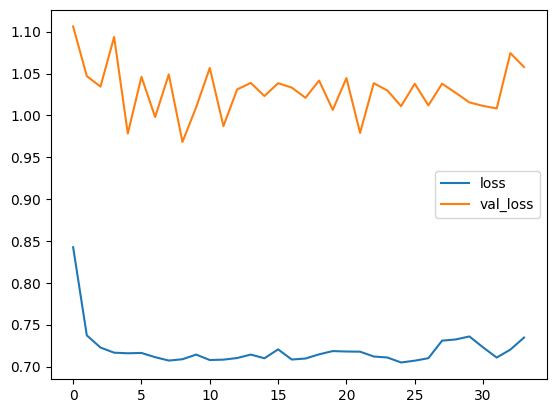

In [43]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()
plt.show()

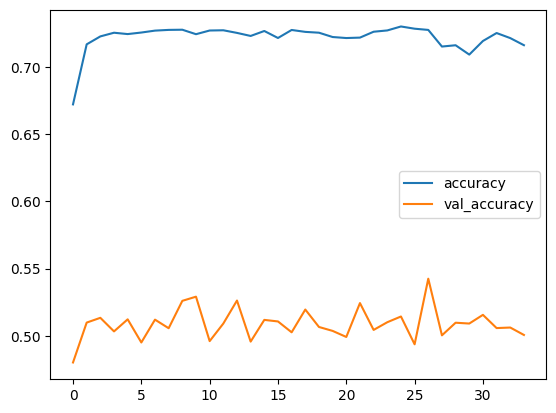

In [44]:
losses[['accuracy', 'val_accuracy']].plot()
plt.show()

In [45]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']


In [62]:
preds = model.predict(X_train)

11339/11339 [==============================] - 45s 4ms/step


In [63]:
print(preds[0])

[3.2599196e-02 6.4701002e-05 9.5481104e-01 3.0805010e-04 1.2217018e-02]


In [64]:
print(np.sum(preds[0]))

1.0


In [65]:
matrix = confusion_matrix(y_train.argmax(axis=1), preds.argmax(axis=1))

In [66]:
matrix

array([[37180, 14093,  4296,  6164, 10833],
       [ 1220, 69093,    65,  1736,   452],
       [  725,   659, 67211,  3748,   223],
       [ 2387,  3764,    66, 61037,  5312],
       [11910, 11315,  2434, 15935, 30972]])

In [67]:
print(classification_report(y_train.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.70      0.51      0.59     72566
           1       0.70      0.95      0.81     72566
           2       0.91      0.93      0.92     72566
           3       0.69      0.84      0.76     72566
           4       0.65      0.43      0.51     72566

    accuracy                           0.73    362830
   macro avg       0.73      0.73      0.72    362830
weighted avg       0.73      0.73      0.72    362830



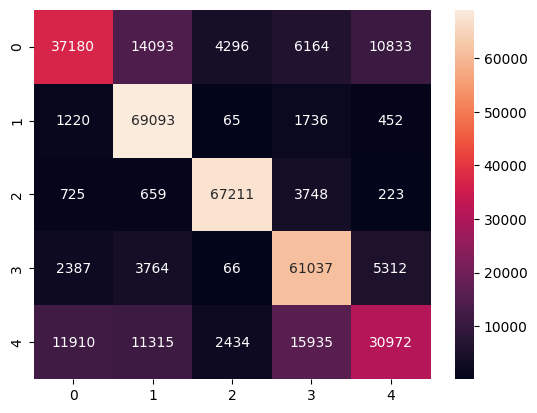

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()

## For the testing dataset

In [54]:
preds = model.predict(X_test)

1883/1883 [==============================] - 9s 5ms/step


In [55]:
print(preds[0])

[0.28107458 0.01131223 0.5470767  0.01088734 0.1496492 ]


In [56]:
print(np.sum(preds[0]))

1.0


In [58]:
matrix = confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

In [59]:
matrix

array([[ 7711,  2324,   958,   741,  3612],
       [   39,   683,     8,     2,    54],
       [   68,     9,  2495,    54,    91],
       [  115,   195,    17,  4195,  1275],
       [ 5903,  5699,  1265,  7653, 15066]])

In [60]:
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.56      0.50      0.53     15346
           1       0.08      0.87      0.14       786
           2       0.53      0.92      0.67      2717
           3       0.33      0.72      0.45      5797
           4       0.75      0.42      0.54     35586

    accuracy                           0.50     60232
   macro avg       0.45      0.69      0.47     60232
weighted avg       0.64      0.50      0.53     60232



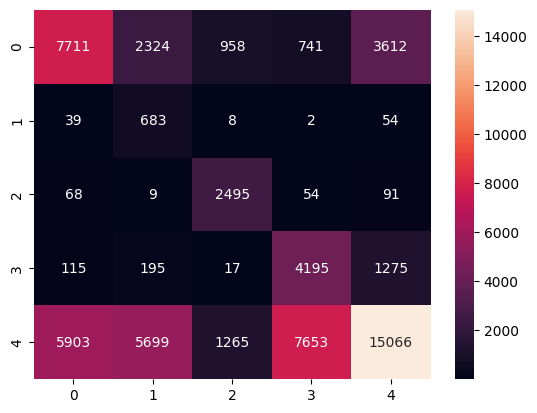

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(matrix, annot = True, fmt = 'd')
plt.show()